In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/smsspamcollection.tsv',sep='\t')
df.head()


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

In [ ]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
df['length'].describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


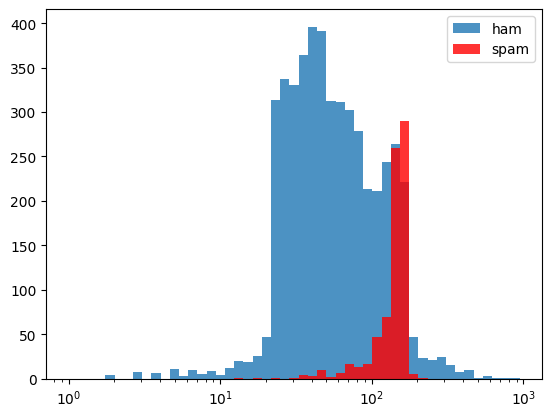

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8, color='red')
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['punct'].describe()

,punct
count,5572.000000
mean,4.177495
std,4.623919
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,133.000000


In [ ]:
x = df[['length','punct']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print('training data shape:',x_train.shape)
print('testing data shape:',x_test.shape)

training data shape: (3733, 2)
testing data shape: (1839, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train,y_train)

LogisticRegression()